<a href="https://colab.research.google.com/github/dudaholandah/PIBIC/blob/main/Nutricao/frequencia_carnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("sample_data/tabela_veg.xlsx", sheet_name='Plan1')

In [ ]:
data.head()

In [49]:
# bom para algumas palavras e ruim para outras

import nltk
from nltk.metrics.distance  import edit_distance
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams

from nltk.corpus import floresta

nltk.download('floresta')
corretas = nltk.corpus.floresta.words()

word = "qeijo"

temp = [(jaccard_distance(set(ngrams(word, 2)),
                          set(ngrams(w, 2))),w)
        for w in corretas if w[0]==word[0]]
print(sorted(temp, key = lambda val:val[0])[0][1])


temp = [(edit_distance(word, w),w) for w in corretas if w[0]==word[0]]
print(sorted(temp, key = lambda val:val[0])[0][1])

[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
queijo
queijo


In [ ]:
import re

stopwords = ['de', 'e', 'em']
stopsigns = [',', '.', '(', ')']

carnes1 = []
carnes2 = []
carnes3 = []
text_carnes1 = ""
text_carnes2 = ""
text_carnes3 = ""

for i in range(278):
  if re.findall('^CARNES',data['Classificação'][i]):
    ingredientes = data['Ingredientes'][i]

    for word in stopwords:
      token = " " + word + " "
      ingredientes = ingredientes.replace(token, " ")

    for sign in stopsigns:
      ingredientes = ingredientes.replace(sign, " ")

    ingredientes = ingredientes.split()

    for word in ingredientes:

      if data['Classificação'][i] == "CARNES 1":
        carnes1.append(word.lower())
        text_carnes1 += word.lower()
        text_carnes1 += " "

      elif data['Classificação'][i] == "CARNES 2":
        carnes2.append(word.lower())
        text_carnes2 += word.lower()
        text_carnes2 += " "

      else:
        carnes3.append(word.lower())
        text_carnes3 += word.lower()
        text_carnes3 += " "

print(carnes3)
print(text_carnes3)

In [63]:
freq_carnes1 = {}
freq_carnes2 = {}
freq_carnes3 = {}

def frequencia(elems, freq):
  for elem in elems:
    if elem in freq:
      freq[elem] += 1
    else:
      freq.update({elem: 1})

  import operator
  return sorted(freq.items(), key=operator.itemgetter(1), reverse=True)

freq_carnes1 = frequencia(carnes1, freq_carnes1)
freq_carnes2 = frequencia(carnes2, freq_carnes2)
freq_carnes3 =frequencia(carnes3, freq_carnes3)

In [66]:
import plotly.express as px

print("CARNES 1")
df = pd.DataFrame(data=freq_carnes1, columns=['ingredientes', 'frequencia'])
fig = px.bar(df, x="ingredientes", y="frequencia")
fig.update_xaxes(range=(-.5, 30.5))
fig.show()

print("CARNES 2")
df = pd.DataFrame(data=freq_carnes2, columns=['ingredientes', 'frequencia'])
fig = px.bar(df, x="ingredientes", y="frequencia")
fig.update_xaxes(range=(-.5, 30.5))
fig.show()

print("CARNES 3")
df = pd.DataFrame(data=freq_carnes3, columns=['ingredientes', 'frequencia'])
fig = px.bar(df, x="ingredientes", y="frequencia")
fig.update_xaxes(range=(-.5, 30.5))
fig.show()

CARNES 1


CARNES 2


CARNES 3


CARNES 1


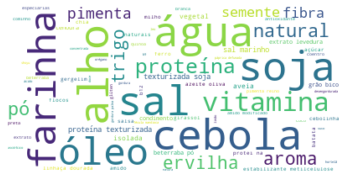

CARNES 2


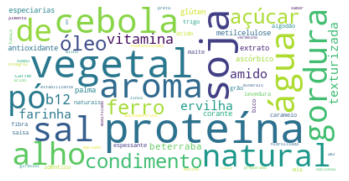

CARNES 3


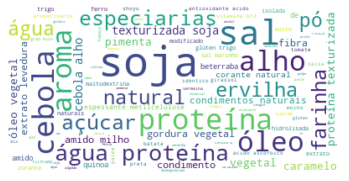

In [68]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

print("CARNES 1")
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_carnes1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("CARNES 2")
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_carnes2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("CARNES 3")
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_carnes3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()